###### TUGAS PROJECT FINAL MACHINE LEARNING

Anggota Kelompok: 

               Mustafian (H081201044)
               Rahmat Diza Ramadhan (H081201052)
               Rohadatul Aisy Hanifah Ginting (H081201058)
               Hamza Hamid (H081201059)

### Deskripsi Data

    1.  ID: Identifikasi unik untuk setiap individu dalam dataset
    2.  AGE: Usia seseorang dalam tahun
    3.  GENDER: Jenis kelamin
    4.  RACE: Ras atau etnis seseorang
    5.  DRIVING_EXPERIENCE: Pengalaman mengemudi seseorang dalam tahun
    6.  EDUCATION: Tingkat pendidikan
    7.  INCOME: Tingkat Pendapatan
    8.  CREDIT_SCORE: Skor kredit yang mencerminkan seberapa baik dalam membayar pinjaman
    9.  VEHICLE_OWNERSHIP: Menunjukkan apakah seseorang memiliki kendaraan atau tidak
    10. VEHICLE_YEAR: Tahun pembuatan kendaraan 
    11. MARRIED: Menunjukkan apakah seseorang menikah atau tidak
    12. CHILDREN: Ini mencerminkan jumlah anak yang dimiliki seseorang
    13. POSTAL_CODE: kode pos tempat tinggal 
    14. ANNUAL_MILEAGE: Perkiraan jarak tempuh tahunan seseorang dengan kendaraan mereka
    15. VEHICLE_TYPE: Jenis kendaraan
    16. SPEEDING_VIOLATIONS: jumlah pelanggaran kecepatan yang dilakukan 
    17. DUIS: Driving Under the Influence
    18. PAST_ACCIDENTS: Jumlah kecelakaan yang pernah dialami oleh seseorang  
    19. OUTCOME: Hasil atau klaim terkait asuransi mobil, apakah ada klaim diajukan atau tidak

> Dalam kasus ini 'Outcome' sebagai variabel respon.

# Import Library dan Data

In [2]:
# Import Package
import os
import pandas as pd
import numpy as np

# Package untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Package untuk cleaning, modelling, dan evaluation model
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier


In [3]:
#Load Data
df = pd.read_csv('C:/Users/AVITA/Downloads/Car_Insurance_Claim.csv', index_col=0)

In [4]:
# Menampilkan beberapa baris data teratas
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
# Menampilkan 5 data terakhir
df.tail()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


# Eksplorasi Data

In [6]:
# Cek informasi yang terdapat di data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 569520 to 442696
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  object 
 1   GENDER               10000 non-null  object 
 2   RACE                 10000 non-null  object 
 3   DRIVING_EXPERIENCE   10000 non-null  object 
 4   EDUCATION            10000 non-null  object 
 5   INCOME               10000 non-null  object 
 6   CREDIT_SCORE         9018 non-null   float64
 7   VEHICLE_OWNERSHIP    10000 non-null  float64
 8   VEHICLE_YEAR         10000 non-null  object 
 9   MARRIED              10000 non-null  float64
 10  CHILDREN             10000 non-null  float64
 11  POSTAL_CODE          10000 non-null  int64  
 12  ANNUAL_MILEAGE       9043 non-null   float64
 13  VEHICLE_TYPE         10000 non-null  object 
 14  SPEEDING_VIOLATIONS  10000 non-null  int64  
 15  DUIS                 10000 non

In [7]:
#Menampilkan ukuran data
df.shape

(10000, 18)

In [8]:
print(set(df['OUTCOME']))

{0.0, 1.0}


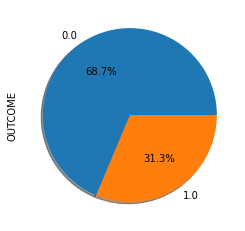

In [9]:
# Mencari perbandingan label/class
df['OUTCOME'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [10]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

Dari output perhitungan jumlah tiap kategori pada variabel 'OUTCOME' di atas, diketahui bahwa kategori 0.0 (tidak klaim) lebih mendominasi dengan persentase sekitar 68,7% dibandingkan dengan kategori 1.0 (klaim) dengan persentase sekitar 31,3% 

In [11]:
#Mengetahui deskripsi data
display(df.describe(include=[np.number]))
display(df.describe(exclude=[np.number])) 

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


In [12]:
#Menampilkan deskripsi data untuk kategori 0
df[df['OUTCOME']==0.0].describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,6189.000000,6867.000000,6867.000000,6867.000000,6867.000000,6233.000000,6867.000000,6867.000000,6867.000000,6867.0
mean,0.546092,0.814621,0.586719,0.761614,18639.467162,11342.852559,1.924858,0.310179,1.403961,0.0
std,0.128795,0.388633,0.492458,0.426128,17877.674139,2707.982900,2.435035,0.616942,1.815051,0.0
min,0.064810,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.000000,0.000000,0.0
25%,0.463855,1.000000,0.000000,1.000000,10238.000000,9000.000000,0.000000,0.000000,0.000000,0.0
50%,0.559124,1.000000,1.000000,1.000000,10238.000000,11000.000000,1.000000,0.000000,1.000000,0.0
75%,0.638409,1.000000,1.000000,1.000000,32765.000000,13000.000000,3.000000,0.000000,2.000000,0.0
max,0.960819,1.000000,1.000000,1.000000,92101.000000,20000.000000,22.000000,6.000000,15.000000,0.0


In [13]:
#Menampilkan deskripsi data untuk kategori 1
df[df['OUTCOME']==1.0].describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,2829.000000,3133.000000,3133.000000,3133.000000,3133.000000,2810.000000,3133.000000,3133.000000,3133.000000,3133.0
mean,0.449571,0.439196,0.304181,0.529205,22549.716885,12482.562278,0.514204,0.083626,0.294287,1.0
std,0.133246,0.496368,0.460133,0.499226,20763.680160,2899.137837,1.296746,0.337186,0.806002,0.0
min,0.053358,0.000000,0.000000,0.000000,10238.000000,3000.000000,0.000000,0.000000,0.000000,1.0
25%,0.353220,0.000000,0.000000,0.000000,10238.000000,11000.000000,0.000000,0.000000,0.000000,1.0
50%,0.440936,0.000000,0.000000,1.000000,10238.000000,13000.000000,0.000000,0.000000,0.000000,1.0
75%,0.543135,1.000000,1.000000,1.000000,32765.000000,14000.000000,0.000000,0.000000,0.000000,1.0
max,0.857357,1.000000,1.000000,1.000000,92101.000000,22000.000000,11.000000,4.000000,7.000000,1.0


# Preprosesing Data

In [14]:
#Mengidentifikasi Missing Value pada data
missing_df = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/10000)*100})
missing_df

,total_missing,perc_missing
AGE,0,0.00
GENDER,0,0.00
RACE,0,0.00
DRIVING_EXPERIENCE,0,0.00
EDUCATION,0,0.00
INCOME,0,0.00
CREDIT_SCORE,982,9.82
VEHICLE_OWNERSHIP,0,0.00
VEHICLE_YEAR,0,0.00
MARRIED,0,0.00


In [15]:
#Mengisi Missing Value dengan Mean
df.CREDIT_SCORE = df.CREDIT_SCORE.fillna(df.CREDIT_SCORE.mean())
df.ANNUAL_MILEAGE = df.ANNUAL_MILEAGE.fillna(df.ANNUAL_MILEAGE .mean())

In [16]:
#Mengidentifikasi kembali Missing Value pada data
missing_df = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/10000)*100})
missing_df

,total_missing,perc_missing
AGE,0,0.0
GENDER,0,0.0
RACE,0,0.0
DRIVING_EXPERIENCE,0,0.0
EDUCATION,0,0.0
INCOME,0,0.0
CREDIT_SCORE,0,0.0
VEHICLE_OWNERSHIP,0,0.0
VEHICLE_YEAR,0,0.0
MARRIED,0,0.0


In [17]:
#Cek Duplikat Data
duplicate=df[df.duplicated()]
duplicate

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
696360,16-25,female,majority,0-9y,high school,poverty,0.515813,0.0,before 2015,0.0,0.0,10238,14000.000000,sedan,0,0,0,0.0
748256,16-25,male,majority,0-9y,high school,poverty,0.515813,0.0,before 2015,0.0,1.0,32765,11697.003207,sedan,0,0,0,1.0
326735,16-25,male,majority,0-9y,none,poverty,0.515813,0.0,before 2015,0.0,0.0,10238,13000.000000,sedan,0,0,0,1.0
312454,16-25,female,majority,0-9y,none,poverty,0.515813,0.0,before 2015,0.0,0.0,10238,11697.003207,sedan,0,0,0,1.0
376517,16-25,female,majority,0-9y,high school,working class,0.515813,1.0,before 2015,0.0,1.0,10238,9000.000000,sedan,0,0,0,0.0
850513,16-25,female,majority,0-9y,high school,poverty,0.515813,0.0,before 2015,0.0,0.0,10238,15000.000000,sedan,0,0,0,1.0
255663,16-25,female,majority,0-9y,high school,poverty,0.515813,0.0,before 2015,0.0,0.0,10238,14000.000000,sedan,0,0,0,1.0
832426,16-25,male,majority,0-9y,none,poverty,0.515813,0.0,before 2015,0.0,0.0,10238,14000.000000,sedan,0,0,0,1.0
58714,16-25,male,majority,0-9y,none,poverty,0.515813,0.0,before 2015,0.0,0.0,10238,17000.000000,sedan,0,0,0,1.0


In [18]:
#Cek Total Duplikat data
df.duplicated().sum()

12

In [19]:
#Hapus Duplikat Data
df=df.drop_duplicates(keep = 'first')

df.shape

(9988, 18)

In [20]:
#Cek Kembali Total Duplikat data
df.duplicated().sum()

0

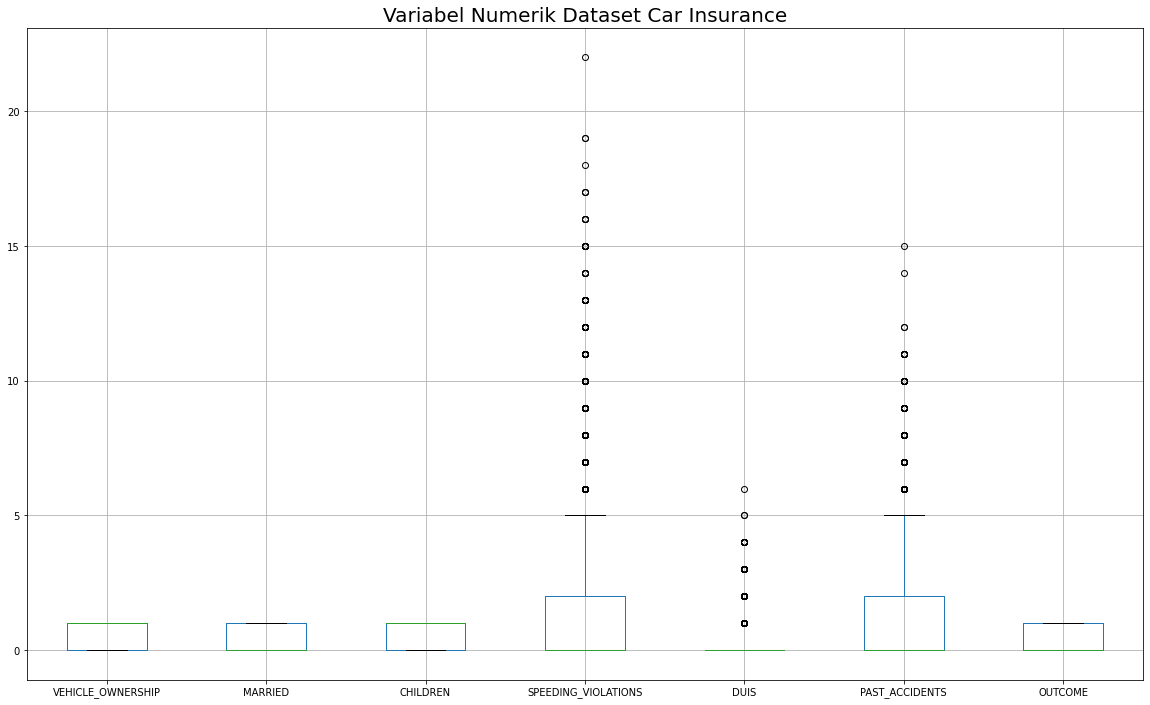

In [21]:
#Mengidentifikasi outlier 
num_cols = ['VEHICLE_OWNERSHIP','MARRIED','CHILDREN','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS','OUTCOME']
plt.figure(figsize=(20,12))
df[num_cols].boxplot()
plt.title("Variabel Numerik Dataset Car Insurance", fontsize=20)
plt.show()

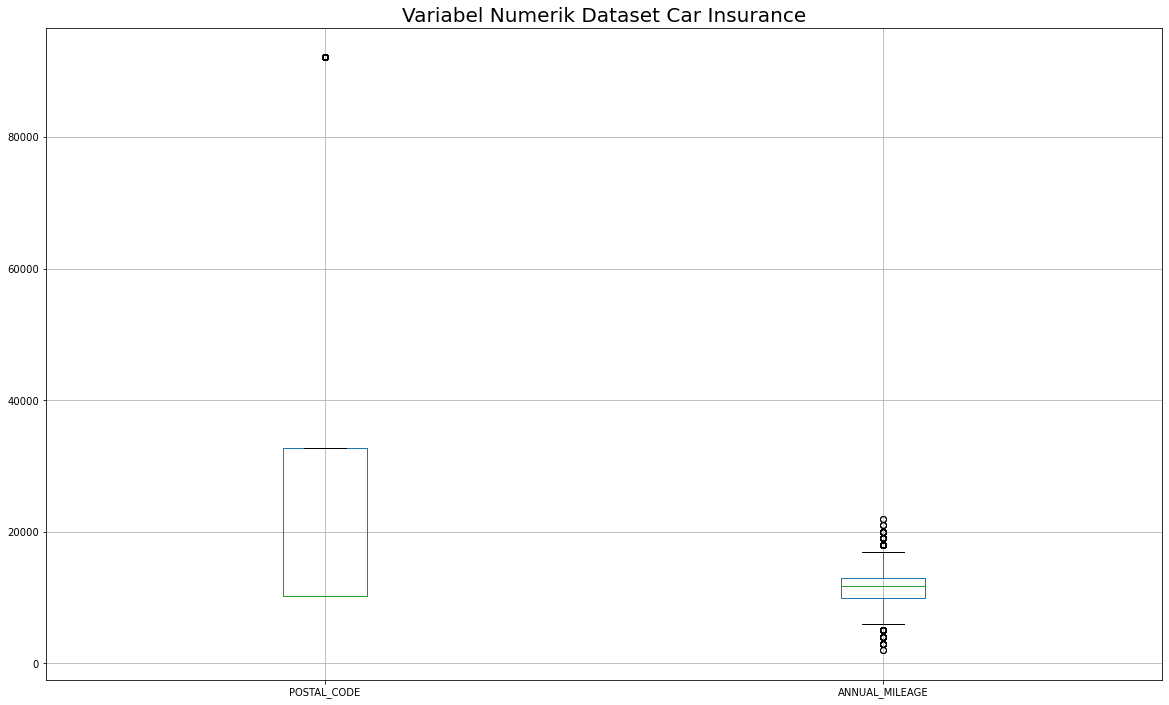

In [22]:
#Mengidentifikasi outlier 
num_cols = ['POSTAL_CODE','ANNUAL_MILEAGE']
plt.figure(figsize=(20,12))
df[num_cols].boxplot()
plt.title("Variabel Numerik Dataset Car Insurance", fontsize=20)
plt.show()

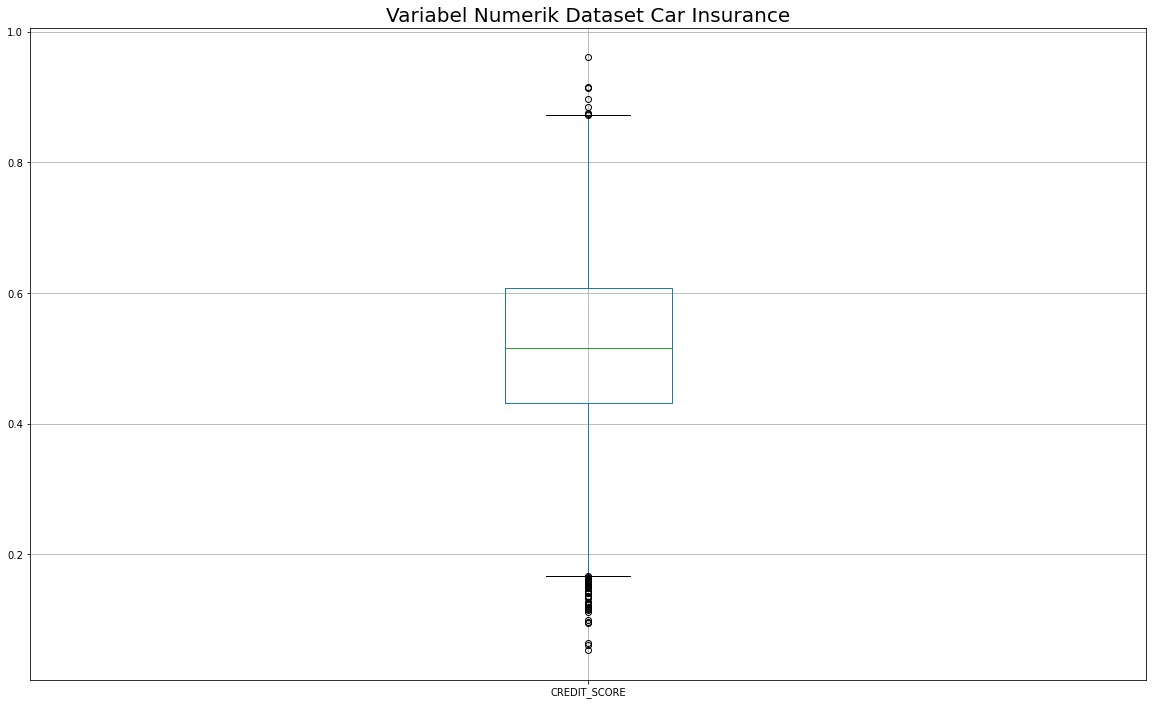

In [23]:
#mengidentifikasi outlier 
num_cols = ['CREDIT_SCORE']
plt.figure(figsize=(20,12))
df[num_cols].boxplot()
plt.title("Variabel Numerik Dataset Car Insurance", fontsize=20)
plt.show()

Karena beberapa variabel memiliki cukup banyak outlier, maka langkah selanjutnya akan dilakukan feature scaling menggunakan MinMaxScaler

In [24]:
kategori = ['AGE','GENDER','RACE','DRIVING_EXPERIENCE','EDUCATION','INCOME', 'VEHICLE_YEAR','VEHICLE_TYPE']
df_cat = df[kategori]

In [25]:
# Ubah kedalam bentuk numerik
encoded_data = LabelEncoder()

for feature in kategori:
        if feature in df.columns.values:
            df[feature] = encoded_data.fit_transform(df[feature])

df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,10238,12000.0,0,0,0,0,0.0
750365,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,10238,16000.0,0,0,0,0,1.0
199901,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,10238,11000.0,0,0,0,0,0.0
478866,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,32765,11000.0,0,0,0,0,0.0
731664,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,32765,12000.0,0,2,0,1,1.0


In [26]:
# Melakukan Feature Scaling
transformation_svm=MinMaxScaler().fit(df[['POSTAL_CODE','ANNUAL_MILEAGE']])

df[['POSTAL_CODE','ANNUAL_MILEAGE']] = transformation_svm.transform(df[['POSTAL_CODE','ANNUAL_MILEAGE']])

df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,,,,,,,,,,,,,,,,,,
569520,3,0,0,0,0,2,0.629027,1.0,0,0.0,1.0,0.000000,0.50,0,0,0,0,0.0
750365,0,1,0,0,1,1,0.357757,0.0,1,0.0,0.0,0.000000,0.70,0,0,0,0,1.0
199901,0,0,0,0,0,3,0.493146,1.0,1,0.0,0.0,0.000000,0.45,0,0,0,0,0.0
478866,0,1,0,0,2,3,0.206013,1.0,1,0.0,1.0,0.275179,0.45,0,0,0,0,0.0
731664,1,1,0,1,1,3,0.388366,1.0,1,0.0,0.0,0.275179,0.50,0,2,0,1,1.0


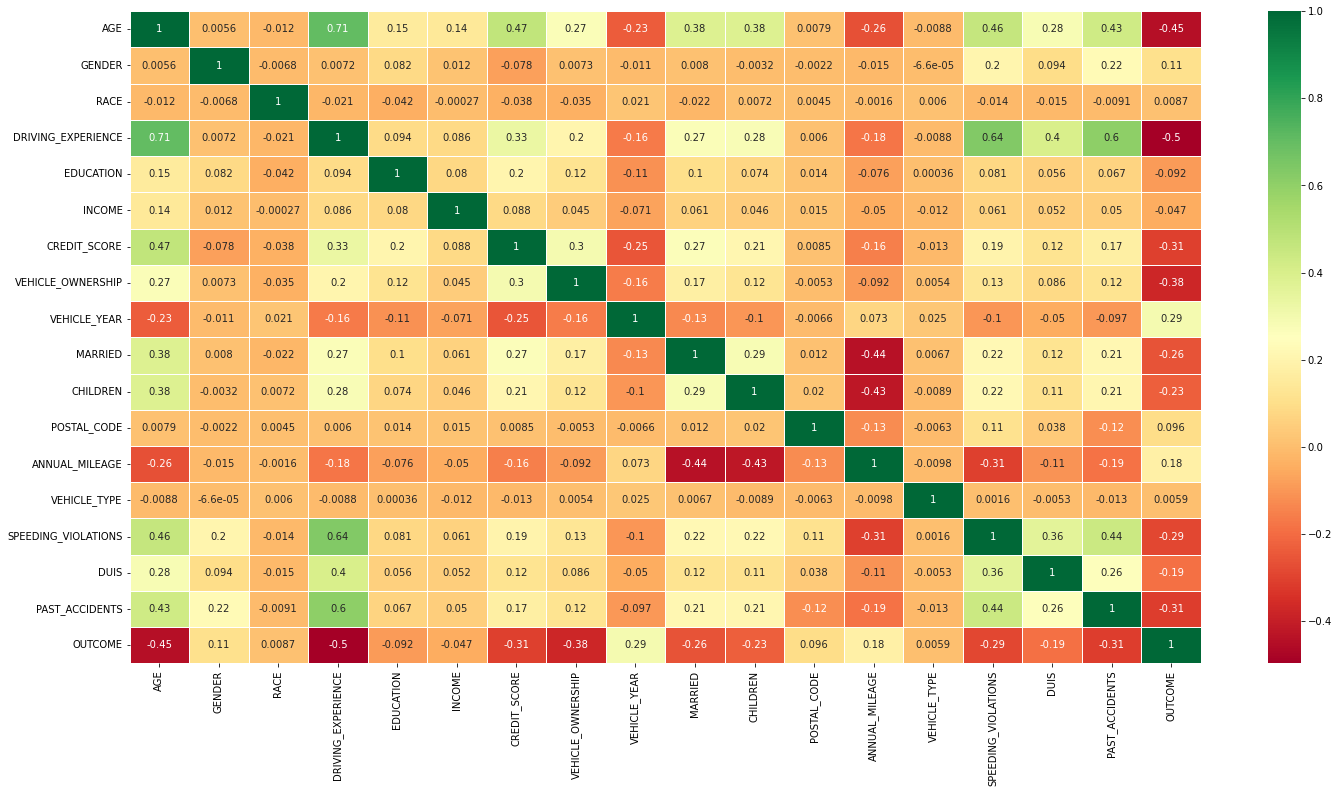

In [27]:
# Cek Korelasi Heatmap
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(24,12)
plt.show()

In [28]:
# Cek Urutan korelasi terendah ke tertinggi
korelasi = df.corr()["OUTCOME"].sort_values()
korelasi

DRIVING_EXPERIENCE    -0.496985
AGE                   -0.447752
VEHICLE_OWNERSHIP     -0.378050
PAST_ACCIDENTS        -0.311094
CREDIT_SCORE          -0.309337
SPEEDING_VIOLATIONS   -0.291462
MARRIED               -0.261273
CHILDREN              -0.231672
DUIS                  -0.189085
EDUCATION             -0.092223
INCOME                -0.046790
VEHICLE_TYPE           0.005880
RACE                   0.008664
POSTAL_CODE            0.096406
GENDER                 0.107464
ANNUAL_MILEAGE         0.176643
VEHICLE_YEAR           0.293819
OUTCOME                1.000000
Name: OUTCOME, dtype: float64

# Splittting Data

In [79]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X Train : ", len(X_train))
print("y Train : ", len(y_train))
print("X Test : ", len(X_test))
print("y Test : ", len(y_test))

X Train :  6991
y Train :  6991
X Test :  2997
y Test :  2997


# Membangung Model

In [80]:
GB_model = GradientBoostingClassifier().fit(X_train, y_train)
print('Model Gradient Boosting Classifier yang terbentuk adalah: \n', GB_model)

Model Gradient Boosting Classifier yang terbentuk adalah: 
 GradientBoostingClassifier()


# Evaluasi Model-Menampilkan Metrics

In [81]:
#predict
y_train_predict = GB_model.predict(X_train)
#print classification report
print('Classification Report Training Model (Gradient Boosting) : ')
print(classification_report(y_train, y_train_predict))

Classification Report Training Model (Gradient Boosting) : 
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      4796
         1.0       0.79      0.77      0.78      2195

    accuracy                           0.86      6991
   macro avg       0.84      0.84      0.84      6991
weighted avg       0.86      0.86      0.86      6991



In [82]:
print(confusion_matrix(y_train, y_train_predict))

[[4344  452]
 [ 503 1692]]


In [83]:
print('Classification Report Test Model (Gradient Boosting) : ')
print(classification_report(y_test, GB_model.predict(X_test)))

Classification Report Test Model (Gradient Boosting) : 
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      2068
         1.0       0.77      0.76      0.76       929

    accuracy                           0.85      2997
   macro avg       0.83      0.83      0.83      2997
weighted avg       0.85      0.85      0.85      2997



In [84]:
print(confusion_matrix(y_test, GB_model.predict(X_test)))

[[1853  215]
 [ 221  708]]


In [85]:
print("Skor Akurasi Data Latih:", accuracy_score(y_train, y_train_predict))
print("Skor Akurasi Data Uji:", accuracy_score(y_test, GB_model.predict(X_test)))

Skor Akurasi Data Latih: 0.8633957945930482
Skor Akurasi Data Uji: 0.8545211878545211
